# _automaton_.is_synchronized

Whether the automaton is synchronized:
- every transition has the same number of letters on every tape, except for a few leading to final states
- in each accepting path, disregarding spontaneous transitions, if a $\varepsilon$ is seen on one tape, no more letters will appear on this tape.
    
Preconditions:
- automaton is a transducer
- automaton has bounded lag

Caveat:
- if the automaton does not have bounded lag, `is_synchronized` will not terminate.

See also:
- [_automaton_.delay_automaton](automaton.delay_automaton.ipynb)
- [_automaton_.has_bounded_lag](automaton.has_bounded_lag.ipynb)
- [_automaton_.synchronize](automaton.synchronize.ipynb)


## Examples

In [1]:
import vcsn
ctx = vcsn.context("lat<law_char, law_char>, b")

The following automaton is not synchronized, because a transition with less letters on the second tape $a| \varepsilon$ is followed by a transition with as many letters on each tape $b|y$.

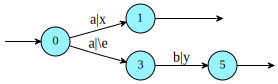

In [2]:
a = ctx.expression(r"a|x+(a|\e)(b|y)").standard()
a

In [3]:
a.is_synchronized()

False

This automaton is synchronized, because the transition with less letters on the first tape occurs "at the end" : it is not followed by transitions with more letters on this tape.

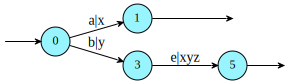

In [4]:
a = ctx.expression(r"a|x+(b|y)(e|xyz)").standard()
a

In [5]:
a.is_synchronized()

True

Spontaneous transitions are not taken in account when checking for synchronization.

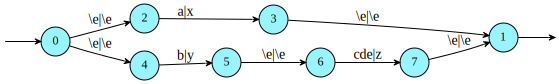

In [6]:
a = ctx.expression(r"a|x+(b|y)(cde|z)").thompson()
a

In [7]:
a.is_synchronized()

True

Note that in a synchronized automaton, the corresponding _delay\_automaton_ has delays of 0 or strictly increasing (apart from spontaneous transitions).

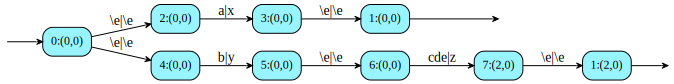

In [8]:
a.delay_automaton()